R² (Anpassungsgüte) = 0.969536279751297

f(x) =  1.47224 * e^(- 0.02801 * x) +  94.61 
(gerundet)

τ (Tau) = 1785.1584564718587 µs (Wie lange dauert es, bis 1/e des ursprünglichen Wertes abgefallen ist?)


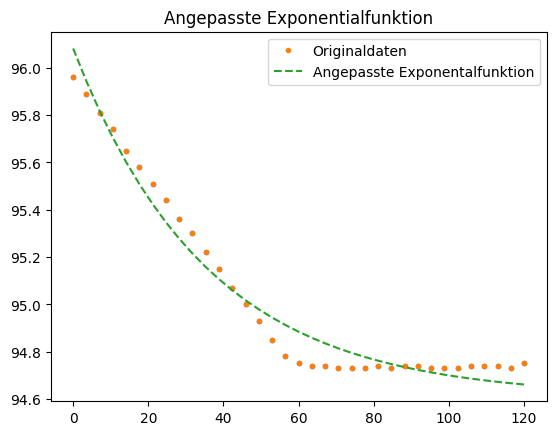

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

#Druckhänderung Hochflug (Ausschnitt: 3,35 bis 56m) (Null macht Probleme)
#Höhe (Meter)
x = np.array([0, 3.53, 7.06, 10.59, 14.12, 17.65, 21.18, 24.71, 28.24, 31.76, 35.29, 38.82, 42.35, 45.88, 49.41, 52.94, 56.47, 60, 63.53, 67.06, 70.59, 74.12, 77.65, 81.18, 84.71, 88.24, 91.76, 95.29, 98.82, 102.35, 105.88, 109.41, 112.94, 116.47, 120])
#Luftdruck
y = np.array([95.96, 95.89, 95.81, 95.74, 95.65, 95.58, 95.51, 95.44, 95.36, 95.3, 95.22, 95.15, 95.07, 95, 94.93, 94.85, 94.78, 94.75, 94.74, 94.74, 94.73, 94.73, 94.73, 94.74, 94.73, 94.74, 94.74, 94.73, 94.73, 94.73, 94.74, 94.74, 94.74, 94.73, 94.75])


plt.plot(x, y, '.')
plt.title("T(t)-Diagramm")

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, x, y, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(y - monoExp(x, m, t, b))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² (Anpassungsgüte) = {rSquared}") # gibt an, wie gut die angepasste Kurve die Daten darstellt (perfekt: 1, grauenvoll: 0)

# plot the results
plt.plot(x, y, '.', label="Originaldaten")
plt.plot(x, monoExp(x, m, t, b), '--', label="Angepasste Exponentalfunktion")
plt.title("Angepasste Exponentialfunktion")
plt.legend()

# inspect the parameters
print(f"\nf(x) = {m: .6} * e^(-{t: .4} * x) + {b: .4} \n(gerundet)\n")
print(f"τ (Tau) = {tauSec * 1e6} µs (Wie lange dauert es, bis 1/e des ursprünglichen Wertes abgefallen ist?)")